## Library imports

In [1]:
# basic imports
import numpy as np
np.set_printoptions(precision=3)

# torch imports
import torch
import torch.nn.functional as F

# plotting library
import matplotlib.pyplot as plt
# %matplotlib notebook

## Intro to Pytorch Upsampling syntax

In [2]:
sample_input = torch.arange(1, 5, dtype=torch.float32).view(1, 1, 2, 2)
print(f"Sample input shape  = {list(sample_input.shape)}")
print(sample_input)

Sample input shape  = [1, 1, 2, 2]
tensor([[[[1., 2.],
          [3., 4.]]]])


## Function to upsample 

- `torch.nn.functional.interpolate(input, size=None, scale_factor=None, mode='nearest', align_corners=None)`
- We can specify the output shape either using `size` or `scale_factor`
- The `mode` argument indicates upsampling algorithm: one of 'nearest', 'linear', 'bilinear', 'bicubic' and 'trilinear'. Default: 'nearest'
- `align_corners` argument – if True, the corner pixels of the input and output tensors are aligned, and thus preserving the values at those pixels. Default: False

**Note : For Linear interpolation, we need atleast 3D input, For bilinear interpolation, we need at least 4D input and so on**

In [3]:
# 1. Nearest neighbours method
nearest_neighbour_out = F.interpolate(sample_input, scale_factor=2, mode='nearest').numpy()
print(f"Nearest Neighbour Out shape  = {list(nearest_neighbour_out.shape)}")
print(np.squeeze(nearest_neighbour_out)[()])

Nearest Neighbour Out shape  = [1, 1, 4, 4]
[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [4]:
# 2. Bilinear interpolation method with align corner = False
bilinear_interp_align_false_out = F.interpolate(sample_input, scale_factor=2, mode='bilinear', align_corners=False).numpy()
print(f"Bilinear interpolation with align Corner -> False Out shape  = {list(bilinear_interp_align_false_out.shape)}")
print(np.squeeze(bilinear_interp_align_false_out)[()])

Bilinear interpolation with align Corner -> False Out shape  = [1, 1, 4, 4]
[[1.   1.25 1.75 2.  ]
 [1.5  1.75 2.25 2.5 ]
 [2.5  2.75 3.25 3.5 ]
 [3.   3.25 3.75 4.  ]]


In [5]:
# 3. Bilinear interpolation method with align corner = True
bilinear_interp_align_true_out =  F.interpolate(sample_input, scale_factor=2, mode='bilinear', align_corners=True).numpy()
print(f"Bilinear interpolation with align Corner -> True Out shape  = {list(bilinear_interp_align_true_out.shape)}")
print(np.squeeze(bilinear_interp_align_true_out)[()])

Bilinear interpolation with align Corner -> True Out shape  = [1, 1, 4, 4]
[[1.    1.333 1.667 2.   ]
 [1.667 2.    2.333 2.667]
 [2.333 2.667 3.    3.333]
 [3.    3.333 3.667 4.   ]]


## Visualize Different methods Output

In [6]:
# Load a sample image taken from MNIST dataset
sample_img = torch.load('upsample_test_img.pt')
print(sample_img.shape)

torch.Size([1, 1, 28, 28])


In [7]:
# Upsample input image by 2 using methods highlighted above
nearest_neighbour_upsample = F.interpolate(sample_img, scale_factor=2, mode='nearest')
bilinear_inter_align_false_upsample = F.interpolate(sample_img, scale_factor=2, mode='bilinear', align_corners=False)
bilinear_inter_align_true_upsample = F.interpolate(sample_img, scale_factor=2, mode='bilinear', align_corners=True)

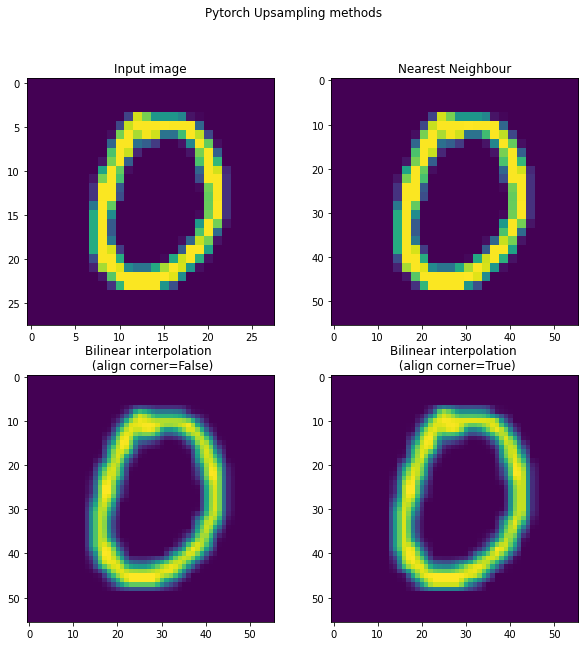

In [8]:
# Visualize subplots
fig, axes = plt.subplots(2, 2, figsize = (10,10))
axes = axes.flatten()
plt.suptitle('Pytorch Upsampling methods')

# original image
axes[0].imshow(sample_img[0].reshape(28,28))
axes[0].set_title('Input image')

# Nearest neighbour upsampling
axes[1].imshow(nearest_neighbour_upsample[0].reshape(56,56))
axes[1].set_title('Nearest Neighbour')

#  Bilinear interpolation method with align corner = False
axes[2].imshow(bilinear_inter_align_false_upsample[0].reshape(56,56))
axes[2].set_title('Bilinear interpolation \n (align corner=False)')

#  Bilinear interpolation method with align corner = True
axes[3].imshow(bilinear_inter_align_true_upsample[0].reshape(56,56))
axes[3].set_title('Bilinear interpolation \n (align corner=True)');

## References

- [Pytorch Upsample documentation](https://pytorch.org/docs/stable/generated/torch.nn.Upsample)
- [Functional.interpolate vs nn.Upsample Pytorch forum](https://discuss.pytorch.org/t/which-function-is-better-for-upsampling-upsampling-or-interpolate/21811/7)